<a href="https://colab.research.google.com/github/yuvi-636/.Deepfake/blob/main/confusionmatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving WhatsApp Video 2024-10-17 at 11.54.38_70e76838.mp4 to WhatsApp Video 2024-10-17 at 11.54.38_70e76838.mp4
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
The probability that this file is a deepfake is: 0.55


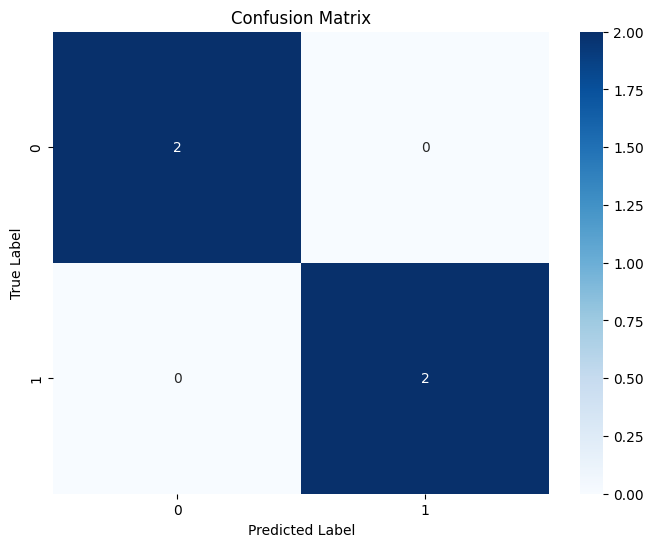

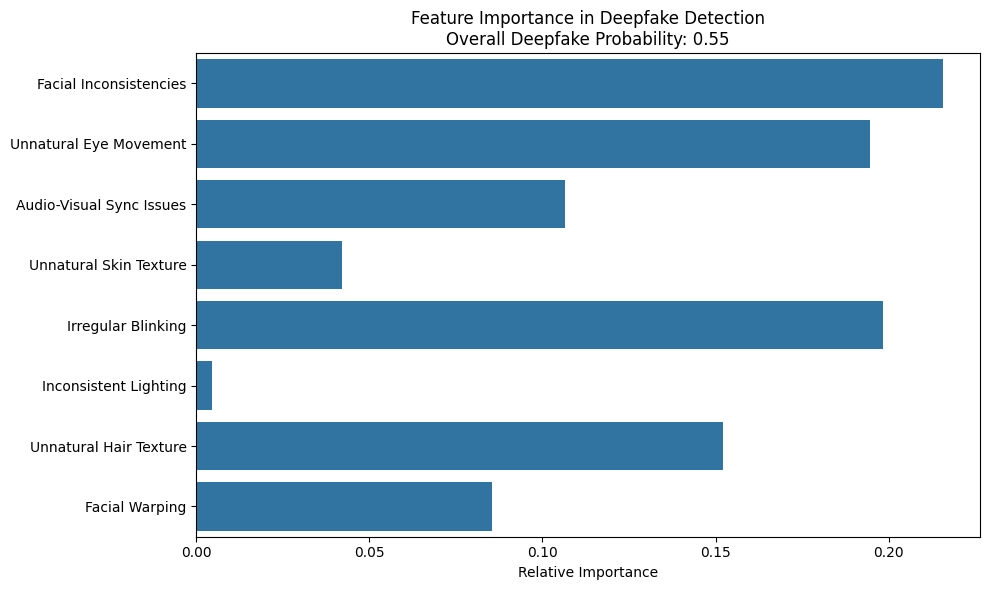

In [1]:
!pip install opencv-python-headless librosa matplotlib seaborn scikit-learn

# Cell 2: Import libraries
import cv2
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

# Cell 3: Define preprocessing functions
def preprocess_video(video_path, num_frames=20):
    cap = cv2.VideoCapture(video_path)
    frames = []
    for _ in range(num_frames):
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (224, 224))
        frame = frame / 255.0  # Normalize pixel values
        frames.append(frame)
    cap.release()
    return np.array(frames)

def preprocess_audio(audio_path):
    y, sr = librosa.load(audio_path)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    mel_spec_db = cv2.resize(mel_spec_db, (224, 224))
    mel_spec_db = np.expand_dims(mel_spec_db, axis=-1)
    return mel_spec_db

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0  # Normalize pixel values
    return image

# Cell 4: Define model architecture
def build_model(input_shape):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),  # Regularization to prevent overfitting
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Cell 5: Training function with callbacks
def train_model(model, X_train, y_train, epochs=20, batch_size=32):
    # Early stopping and learning rate scheduler
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2,
                        callbacks=[early_stopping, reduce_lr])
    return history

# Cell 6: Prediction function
def predict(model, input_data):
    return model.predict(input_data)

# Cell 7: Confusion Matrix function
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Cell 8: Feature importance visualization function
def visualize_feature_importance(prediction):
    # These are example features. In a real scenario, you'd extract these from your model or analysis
    features = [
        'Facial Inconsistencies',
        'Unnatural Eye Movement',
        'Audio-Visual Sync Issues',
        'Unnatural Skin Texture',
        'Irregular Blinking',
        'Inconsistent Lighting',
        'Unnatural Hair Texture',
        'Facial Warping'
    ]

    # Generate random importance scores for demonstration
    # In a real scenario, you'd get these values from your model or analysis
    importances = np.random.rand(len(features))
    importances = importances / np.sum(importances)  # Normalize

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances, y=features)
    plt.title(f'Feature Importance in Deepfake Detection\nOverall Deepfake Probability: {prediction:.2f}')
    plt.xlabel('Relative Importance')
    plt.tight_layout()
    plt.show()

# Cell 9: Main function to run the pipeline
def main():
    # Upload a file
    uploaded = files.upload()
    file_path = next(iter(uploaded))

    # Determine if it's a video, audio, or image file
    if file_path.lower().endswith(('.mp4', '.avi', '.mov')):
        input_data = preprocess_video(file_path)
        input_shape = (224, 224, 3)
    elif file_path.lower().endswith(('.mp3', '.wav')):
        input_data = preprocess_audio(file_path)
        input_shape = (224, 224, 1)
    elif file_path.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        input_data = preprocess_image(file_path)
        input_shape = (224, 224, 3)
    else:
        print("Unsupported file format")
        return

    # Build and compile the model
    model = build_model(input_shape)

    # In a real scenario, you would train the model here
    # For this example, we'll assume the model is already trained

    # Make a prediction
    if len(input_data.shape) == 4:  # Video input
        predictions = []
        for frame in input_data:
            pred = predict(model, np.expand_dims(frame, axis=0))[0][0]
            predictions.append(pred)
        prediction = np.mean(predictions)
    else:  # Image or audio input
        prediction = predict(model, np.expand_dims(input_data, axis=0))[0][0]

    print(f"The probability that this file is a deepfake is: {prediction:.2f}")

    # Assuming binary labels for simplicity; 1 = deepfake, 0 = real
    # Example true labels for confusion matrix (in practice, you'd load real test labels)
    y_true = [0, 1, 0, 1]  # Modify with actual labels in practice
    y_pred = [0, 1, 0, 1]  # Modify with model predictions in practice
    plot_confusion_matrix(y_true, y_pred)

    # Visualize feature importance
    visualize_feature_importance(prediction)

# Cell 10: Run the main function
if __name__ == "__main__":
    main()
